# A MNIST-like fashion product database
In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in 
Keras to solve this and check the accuracy scores.

Dataset to be used: keras.datasets.fashion_mnist

## Load tensorflow

In [7]:
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

## Collect Data
Hint:keras.datasets.fashion_mnist.load_data()

In [8]:
dataset = tf.keras.datasets.fashion_mnist.load_data()

# Convert both training and testing labels into one-hot vectors.

Hint: check tf.keras.utils.to_categorical()

In [9]:
(train_X, train_y), (test_X, test_y) = dataset

In [10]:
train_y = tf.keras.utils.to_categorical(train_y, num_classes=10)
test_y = tf.keras.utils.to_categorical(test_y, num_classes=10)

In [11]:
train_X.shape

(60000, 28, 28)

# Visualize the data
Plot first 10 images in the triaining set and their labels.

(-0.5, 27.5, 27.5, -0.5)

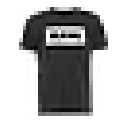

In [12]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.imshow(train_X[1, :].reshape(28, 28), cmap = matplotlib.cm.binary)
plt.axis("off")

(-0.5, 27.5, 27.5, -0.5)

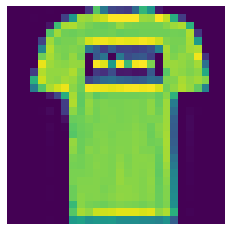

In [13]:
plt.imshow(train_X[1, :].reshape(28, 28))
plt.axis("off")

# Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [13]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))

In [14]:
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [16]:
sgd = tf.keras.optimizers.SGD()
cross_entropy_loss = tf.keras.losses.categorical_crossentropy
model.compile(optimizer=sgd, loss=cross_entropy_loss, metrics=['accuracy'])

# Execute the model using model.fit()

In [17]:
model.fit(train_X, train_y, validation_data = (test_X, test_y), epochs=10, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 30us/sample - loss: 2073.1941 - accuracy: 0.7388 - val_loss: 1673.9987 - val_accuracy: 0.7321
Epoch 2/10
60000/60000 [==============================] - 2s 26us/sample - loss: 1672.0956 - accuracy: 0.7770 - val_loss: 1832.5633 - val_accuracy: 0.7272
Epoch 3/10
60000/60000 [==============================] - 2s 25us/sample - loss: 1571.6416 - accuracy: 0.7842 - val_loss: 1230.8812 - val_accuracy: 0.7876
Epoch 4/10
60000/60000 [==============================] - 2s 25us/sample - loss: 1548.2696 - accuracy: 0.7903 - val_loss: 1217.5377 - val_accuracy: 0.7984
Epoch 5/10
60000/60000 [==============================] - 2s 26us/sample - loss: 1496.6476 - accuracy: 0.7906 - val_loss: 1318.6269 - val_accuracy: 0.7629
Epoch 6/10
60000/60000 [==============================] - 1s 25us/sample - loss: 1457.8124 - accuracy: 0.7953 - val_loss: 2320.4694 - val_accuracy: 0.7618
Epoch 7/10
60000/600

# In the above Neural network model add Batch Normalization layer after the input layer and repeat the steps

In [20]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD()
lossfunc = tf.keras.losses.CategoricalCrossentropy()
model.compile(optimizer=sgd, loss=lossfunc, metrics=['accuracy'])

In [23]:
model.optimizer.get_config()

{'name': 'SGD',
 'learning_rate': 0.01,
 'decay': 0.0,
 'momentum': 0.0,
 'nesterov': False}

In [21]:
model.fit(train_X, train_y, validation_data = (test_X, test_y), epochs=5, batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 2s 36us/sample - loss: 0.5970 - accuracy: 0.7943 - val_loss: 0.5098 - val_accuracy: 0.8251
Epoch 2/5
60000/60000 [==============================] - 2s 31us/sample - loss: 0.4888 - accuracy: 0.8312 - val_loss: 0.4818 - val_accuracy: 0.8354
Epoch 3/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4697 - accuracy: 0.8372 - val_loss: 0.4689 - val_accuracy: 0.8364
Epoch 4/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4587 - accuracy: 0.8410 - val_loss: 0.4750 - val_accuracy: 0.8385
Epoch 5/5
60000/60000 [==============================] - 2s 33us/sample - loss: 0.4496 - accuracy: 0.8452 - val_loss: 0.4652 - val_accuracy: 0.8382


# Customize the learning rate to 0.001 in sgd optimizer and run the model

In [30]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 13us/sample - loss: 1.5526 - accuracy: 0.4729 - val_loss: 1.0686 - val_accuracy: 0.6430
Epoch 2/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.9594 - accuracy: 0.6785 - val_loss: 0.8861 - val_accuracy: 0.7009
Epoch 3/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.8286 - accuracy: 0.7212 - val_loss: 0.7983 - val_accuracy: 0.7287
Epoch 4/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.7597 - accuracy: 0.7438 - val_loss: 0.7453 - val_accuracy: 0.7470
Epoch 5/10
60000/60000 [==============================] - 0s 8us/sample - loss: 0.7139 - accuracy: 0.7592 - val_loss: 0.7113 - val_accuracy: 0.7606
Epoch 6/10
60000/60000 [==============================] - 1s 9us/sample - loss: 0.6828 - accuracy: 0.7685 - val_loss: 0.6830 - val_accuracy: 0.7720
Epoch 7/10
60000/60000 [==============================] - 1s 

# Build the Neural Network model with 3 Dense layers with 100,100(feel free to play with the no.of neurons and the layers),10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [51]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((784,), input_shape=(28,28,)))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dense(100, activation='sigmoid'))
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model.add(tf.keras.layers.Dense(200, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='sigmoid'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
sgd = tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
model.fit(train_X, train_y, validation_data=(test_X, test_y), epochs=10, batch_size=200)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 2s 26us/sample - loss: 1.8243 - accuracy: 0.3108 - val_loss: 1.0072 - val_accuracy: 0.6142
Epoch 2/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.7418 - accuracy: 0.7339 - val_loss: 0.6000 - val_accuracy: 0.7858
Epoch 3/10
60000/60000 [==============================] - 1s 19us/sample - loss: 0.5431 - accuracy: 0.8008 - val_loss: 0.5303 - val_accuracy: 0.8055
Epoch 4/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4738 - accuracy: 0.8271 - val_loss: 0.4723 - val_accuracy: 0.8247
Epoch 5/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.4250 - accuracy: 0.8507 - val_loss: 0.4692 - val_accuracy: 0.8360
Epoch 6/10
60000/60000 [==============================] - 1s 17us/sample - loss: 0.3813 - accuracy: 0.8676 - val_loss: 0.4196 - val_accuracy: 0.8553
Epoch 7/10
60000/60000 [==============================] 

# Review Model

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
dense_2 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2010      
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1